
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---
## Trabajo práctico entregable - Parte 1

# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

# Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [4]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
from scipy import stats
from scipy.stats import pearsonr


seaborn.set_context('talk')

In [5]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [6]:
print('Número de filas dataframe original:',len(df.index))


Número de filas dataframe original: 6095


In [7]:
df[(df['work_contract_type']!='Full-Time')]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
10,Hombre,25,Argentina,Córdoba,1.0,0.0,0.0,0,Terciario,En curso,Analista de Sistemas,Instituto Terciario Interior de Córdoba,"Sí, de forma particular",Sí,Sí,Developer,"Docker, Linux","HTML, Javascript, Python","Bootstrap, Django, jQuery",PostgreSQL,Python Unittest,Visual Studio Code,GNU/Linux,Android,No,0.0,Porcentaje de mi sueldo,Freelance,36800.0,36800.0,NaN,3,4,No,No recibo bono,Uno,15.0,7,En un trabajo anterior,Heterosexual,NaN,No,1-10,Producto basado en Software,8,7,"Horarios flexibles, Sueldo divido en dos pagos...",NaN
38,Hombre,21,Argentina,Córdoba,2.0,0.0,0.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,Universidad católica de Córdoba,No,Sí,Sí,Developer,"Docker, Linux","C++, CSS, HTML, Java, Javascript, Python, SQL,...","Angular, Bootstrap, Drupal, Flask, Flutter, jQ...","MongoDB, MySQL, PostgreSQL, SQLite",Postman,Visual Studio Code,GNU/Linux,Android,No,0.0,Porcentaje de mi sueldo,Part-Time,67000.0,56000.0,NaN,3,2,No,No recibo bono,Uno,1.3,7,Jamás,Heterosexual,NaN,No,11-50,Producto basado en Software,9,10,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
48,Mujer,26,Argentina,GBA,2.0,2.0,2.0,0,Universitario,En curso,Licenciatura en Artes Multimediales,UNA - Universidad Nacional de las Artes,"Sí, de forma particular",No,No,Designer,Ninguna,"CSS, HTML, Java, Javascript",jQuery,Ninguna,Ninguna,"Atom, Visual Studio Code",Windows,Android,No,0.0,Porcentaje de mi sueldo,Tercerizado (trabajo a través de consultora o ...,48800.0,43824.0,NaN,2,2,No,No recibo bono,Uno,12.0,1,Jamás,Heterosexual,NaN,NaN,10001+,Producto basado en Software,6,3,Ninguna de las anteriores,NaN
50,Hombre,27,Argentina,Entre Ríos,3.0,3.0,3.0,0,Universitario,Completado,Ingeniería Electrónica,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular",No,Sí,Developer,Windows Server,".NET, C#, HTML, Javascript, PHP",WordPress,"MySQL, PostgreSQL",Ninguna,"Visual Studio, Visual Studio Code",Windows,Android,No,0.0,Neto,Part-Time,48000.0,40000.0,NaN,1,1,No,No recibo bono,Uno,12.0,1,Jamás,Heterosexual,NaN,NaN,51-100,Otras industrias,5,5,Ninguna de las anteriores,NaN
59,Hombre,26,Argentina,Ciudad Autónoma de Buenos Aires,0.0,0.0,0.0,0,Terciario,En curso,Tecnicatura Superior en Programación,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",Sí,Sí,Developer,Ninguna,"CSS, HTML, Javascript, TypeScript","Angular, Bootstrap, jQuery","Microsoft SQL Server, Oracle",Ninguna,Visual Studio Code,Windows,Android,No,0.0,Porcentaje de mi sueldo,Part-Time,27000.0,21995.0,NaN,2,2,No,No recibo bono,No,0.0,0,Jamás,Heterosexual,NaN,NaN,101-200,Producto basado en Software,8,8,"Capacitaciones y/o cursos, Cuota para universi...","Atos, mercado libre, bbva"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604

# **RESPUESTAS EJERCICIO Nº1**

## **Punto 1. Seleccionar las columnas relevantes para analizar.**

Seleccionamos las siguientes columnas como relevantes a nuestro análisis, teniendo en cuenta la definición a la que arribamos de nuestro universo Ω bajo estudio:


> "***Trabajadores en BLANCO con tipo de contrato full-time cuyo salario no se encuentre dolarizado***".

Columnas relevantes:

*   tools_programming_languages
*   salary_monthly_BRUTO
*   salary_monthly_NETO
*   work_contract_type
*   salary_in_usd 


In [8]:
# complete here if you want to include more columns
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO', 'salary_monthly_BRUTO', 'work_contract_type','salary_in_usd']

## **Punto 2. Seleccionar las filas relevantes para analizar.**

### **VARIABLE: work_contract_type**


Analizamos la distribución de frecuencias de la variable:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Frequency')

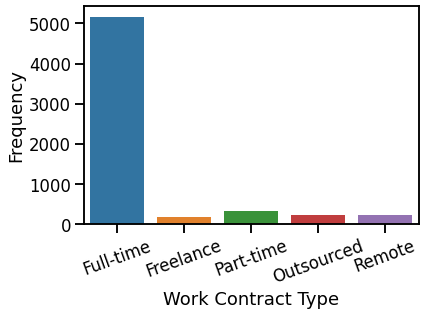

In [9]:
seaborn.countplot(df.work_contract_type);
plt.xticks(rotation=90)
plt.xticks([0,1, 2, 3, 4], labels = ['Full-time', 'Freelance', 'Part-time', 'Outsourced','Remote'], rotation = 20)
plt.xlabel('Work Contract Type')
plt.ylabel('Frequency')

Seleccionamos el tipo de contrato Full-Time por que es el de mayor frecuencia y nos permite establecer una condición base para la comparación de salarios.

In [10]:
df_FT= df[df.work_contract_type=='Full-Time']
print('Número de filas POST 1º filtro:',len(df.index))

Número de filas POST 1º filtro: 6095


### **VARIABLES: salary_monthly_BRUTO y salary_monthly_NETO**



Nuestra población esta definida por personas que trabajan en blanco, por lo que aplicaremos las siguientes condiciones: 

1) Debido a las retenciones por ley, el salario neto debe ser menor al salario bruto.
> *salary_monthly_BRUTO > salary_monthly_NETO.*












In [11]:
df_FT= df_FT[df_FT.salary_monthly_BRUTO > df_FT.salary_monthly_NETO]
print('Número de filas POST "2º filtro:',len(df.index))

Número de filas POST "2º filtro: 6095


Las retenciones por ley son principalmente:

* Retención Obra Social: 3% (MANDATORIA)
* Retención INSSJP: 3% (MANDATORIA)
* Retención Jubilación: 11% (MANDATORIA)
* Retención cuota Sindical: Entre el 2% y 4%.
* Retención Ganancias: Hasta 35 %.

Observamos que las mismas representan al menos el 17% por ciento de nuestro salario, si consideramos solo las MANDATORIAS. 
Por otro lado podrían significar un máximo del 56%, si se consideraran los porcentajes máximos de cada una.

Definimos y calculamos una nueva variable para representar el "Porcentaje Retención" = (salary_monthly_BRUTO - salary_monthly_NETO) *100/salary_monthly_BRUTO. 


In [12]:
df_FT['porcentaje_retencion']= ((df_FT['salary_monthly_BRUTO']- df_FT['salary_monthly_NETO']) * 100 ) /(df_FT['salary_monthly_BRUTO'])
df_FT[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city,porcentaje_retencion
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.0,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN,18.867925
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.0,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN,20.253165
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.0,NaN,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN,20.625000


2) Entonces, establecemos las siguentes condiciones:

porcentaje_Retencion >= 17 %

porcentaje_Retencion <= 56 %

In [13]:
df_FT= df_FT[(df_FT['porcentaje_retencion'] < 57) & (df_FT['porcentaje_retencion'] >= 17)]
print('Número de filas POST 3º filtro:',len(df_FT.index))


Número de filas POST 3º filtro: 3453


In [14]:
df_FT[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city,porcentaje_retencion
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.0,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN,18.867925
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.0,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN,20.253165
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.0,NaN,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN,20.625000


#### **Análisis de la distribución de la variable salary_monthly_NETO mediante los percentiles**

Buscaremos determinar el rango de valores del salario mensual NETO a considerar, eliminando los valores extremos, mediante la identificación de los limites inferior y superior a partir de un análisis de los percentiles mínimo y máximo.

Graficamos la distribución de la variable antes de aplicar los limites al rango.

In [15]:
data = df_FT['salary_monthly_NETO']
print('Media', data.mean())
print('Mediana',data.median())
print('Desviación Estándar',data.std())

Media 94150.17673877788
Mediana 89000.0
Desviación Estándar 48890.35109788483


Text(0.5, 0, 'Net salary (ARS)')

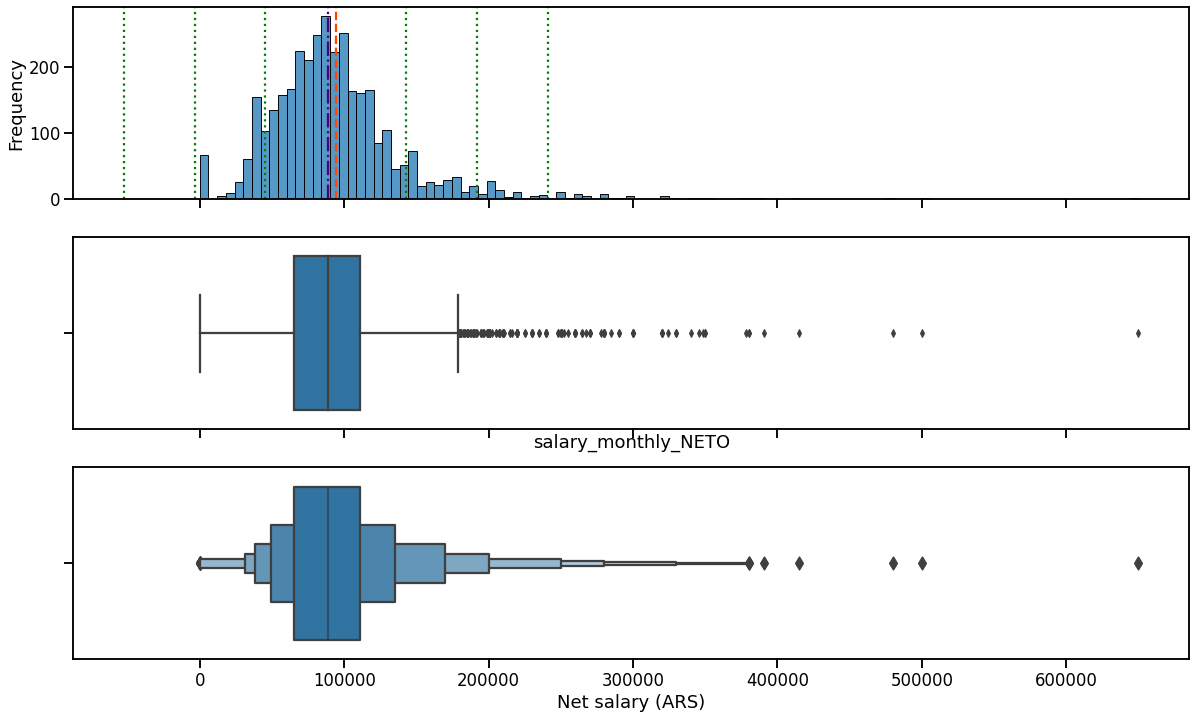

In [16]:
fig, axes = plt.subplots(figsize=(20, 12), nrows=3,sharex=True)

seaborn.histplot(x=data, ax=axes[0])
axes[0].axvline(data.mean(), color='orangered',
            linestyle='--', label='Media')
axes[0].axvline(data.median(), color='indigo',
            linestyle='-.', label='Mediana')
axes[0].axvline(data.mean()+ data.std(), color='green',
            linestyle='dotted', label='1 Std')
axes[0].axvline(data.mean()- data.std(), color='green',
            linestyle='dotted', label='-1 Std')
axes[0].axvline(data.mean()+ 2 * data.std(), color='green',
            linestyle='dotted', label='2 Std')
axes[0].axvline(data.mean()- 2 * data.std(), color='green',
            linestyle='dotted', label='-2 Std')
axes[0].axvline(data.mean()+ 3 * data.std(), color='green',
            linestyle='dotted', label='2 Std')
axes[0].axvline(data.mean()- 3 * data.std(), color='green',
            linestyle='dotted', label='-2 Std')
axes[0].set_ylabel('Frequency')
seaborn.boxplot(x=data, ax=axes[1])
seaborn.boxenplot(x=data, ax=axes[2])
plt.xlabel('Net salary (ARS)')

=> Calculamos los percentiles mínimos.

In [17]:
df_FT['salary_monthly_NETO'].quantile([.01, .02, .021, .022, .023, .024])

0.010       83.000
0.020    16656.000
0.021    19949.200
0.022    20523.472
0.023    24396.000
0.024    25000.000
Name: salary_monthly_NETO, dtype: float64

Teniendo en cuenta que el salario vital y móvil establecido en el Boletín Oficial de la Nación a partir del 1° abril de 2020 es de: PESOS VEINTITRES MIL QUINIENTOS CUARENTA Y CUATRO ($23.544,00), vamos a considerar como limite inferior el percentil inmediato superior, es decir, el percentil 2,4.

In [18]:
j = 2.4
percentile_024 = df_FT['salary_monthly_NETO'].quantile(j / 100)
n_below = len(df_FT[df_FT['salary_monthly_NETO'] < percentile_024])
n_above = len(df_FT[df_FT['salary_monthly_NETO'] > percentile_024])
print('Percentil {} de la columna {}: {}'.format(j, 'salary_monthly_NETO', percentile_024))
print('% de datos menor que percentil {}: {}'.format(j, n_below / len(df_FT)))
print('% de datos mayor que percentil {}: {}'.format(j, n_above / len(df_FT)))

Percentil 2.4 de la columna salary_monthly_NETO: 25000.0
% de datos menor que percentil 2.4: 0.023168259484506227
% de datos mayor que percentil 2.4: 0.9756733275412685


=> Calculamos los percentiles máximos.

In [19]:
df_FT['salary_monthly_NETO'].quantile([.95, .96, .97, .98, .99, .995])

0.950    180000.0
0.960    190000.0
0.970    200000.0
0.980    225000.0
0.990    273840.0
0.995    320000.0
Name: salary_monthly_NETO, dtype: float64

Vamos a considerar como percentil máximo el 98.

In [20]:
k = 98
percentile_98 = df_FT['salary_monthly_NETO'].quantile(k / 100)
n_below = len(df_FT[df_FT['salary_monthly_NETO'] < percentile_98])
n_above = len(df_FT[df_FT['salary_monthly_NETO'] > percentile_98])
print('Percentil {} de la columna {}: {}'.format(k, 'salary_monthly_NETO', percentile_98))
print('% de datos menor que percentil {}: {}'.format(k, n_below / len(df_FT)))
print('% de datos mayor que percentil {}: {}'.format(k, n_above / len(df_FT)))

Percentil 98 de la columna salary_monthly_NETO: 225000.0
% de datos menor que percentil 98: 0.9794381697075007
% de datos mayor que percentil 98: 0.01998262380538662


Establecemos finalmente la siguiente condición sobre la columna salary_monthly_NETO:


> salary_monthly_NETO >= percentil 2,4


> salary_monthly_NETO < percentil 98





In [21]:
df_rango= df_FT[(df_FT['salary_monthly_NETO'] < percentile_98) & (df_FT['salary_monthly_NETO'] >= percentile_024)]

print('Número de filas POST 4º filtro:',len(df_rango.index))


Número de filas POST 4º filtro: 3302


Finalmente graficamos la distribución de la variable salario mensual NETO después de aplicar el rango:

In [22]:
data_rango = df_rango['salary_monthly_NETO']
print('Media', data_rango.mean())
print('Mediana',data_rango.median())
print('Desviación Estándar',data_rango.std())

Media 92065.40183827985
Mediana 89000.0
Desviación Estándar 36530.10910433751


Text(0.5, 0, 'Net salary (ARS)')

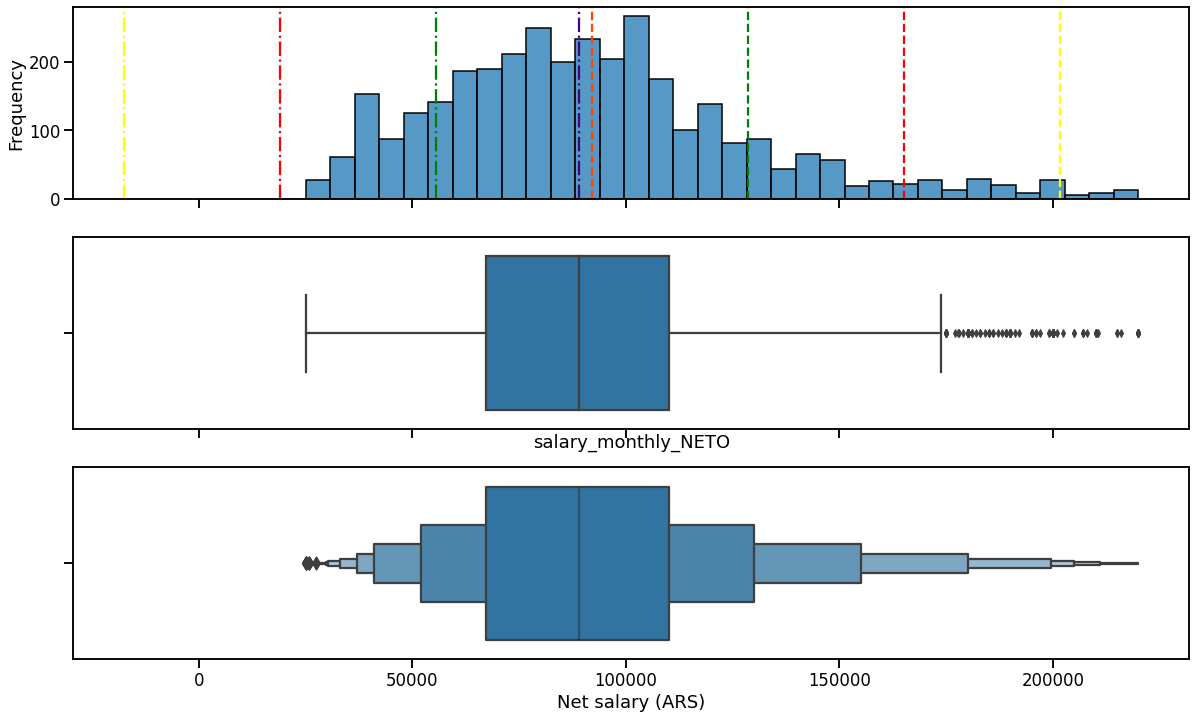

In [23]:
fig, axes = plt.subplots(figsize=(20, 12), nrows=3,sharex=True)
seaborn.histplot(x=data_rango, ax=axes[0])
axes[0].axvline(data_rango.mean(), color='orangered',
            linestyle='--', label='Media')
axes[0].axvline(data_rango.median(), color='indigo',
            linestyle='-.', label='Mediana')
axes[0].axvline(data_rango.mean()+ data_rango.std(), color='green',
            linestyle='--', label='1 Std')
axes[0].axvline(data_rango.mean()- data_rango.std(), color='green',
            linestyle='-.', label='-1 Std')
axes[0].axvline(data_rango.mean()+ 2 * data_rango.std(), color='red',
            linestyle='--', label='2 Std')
axes[0].axvline(data_rango.mean()- 2 * data_rango.std(), color='red',
            linestyle='-.', label='-2 Std')
axes[0].axvline(data_rango.mean()+ 3 * data_rango.std(), color='yellow',
            linestyle='--', label='2 Std')
axes[0].axvline(data_rango.mean()- 3 * data_rango.std(), color='yellow',
            linestyle='-.', label='-2 Std')
axes[0].set_ylabel('Frequency')

seaborn.boxplot(x=data_rango, ax=axes[1])

seaborn.boxenplot(x=data_rango, ax=axes[2])


plt.xlabel('Net salary (ARS)')

### **VARIABLE: salary_in_usd**

Transformaremos los datos de esta variable reemplazando los valores NaN por  'NO' y 'Mi sueldo está dolarizado' por 'SI'.

In [24]:
df_rango.salary_in_usd = df_rango.salary_in_usd.fillna('NO');
df_rango.salary_in_usd= df_rango.salary_in_usd.replace({"Mi sueldo está dolarizado": "SI"});
df_rango[:3]

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city,porcentaje_retencion
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.0,NO,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN,18.867925
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.0,NO,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN,20.253165
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.0,NO,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN,20.625000


Graficamos la distribución de frecuencias de la variable "salary_in_usd".

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Salary in USD')

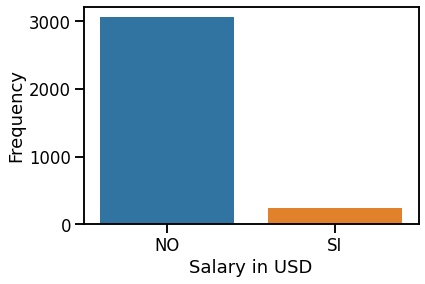

In [25]:
seaborn.countplot(df_rango.salary_in_usd);
plt.ylabel('Frequency')
plt.xlabel('Salary in USD')

Graficamos la distribución de frecuencias del salario mensual NETO para salarios dolarizados y salarios NO dolarizados.

Text(0.5, 0, 'Net salary (ARS)')

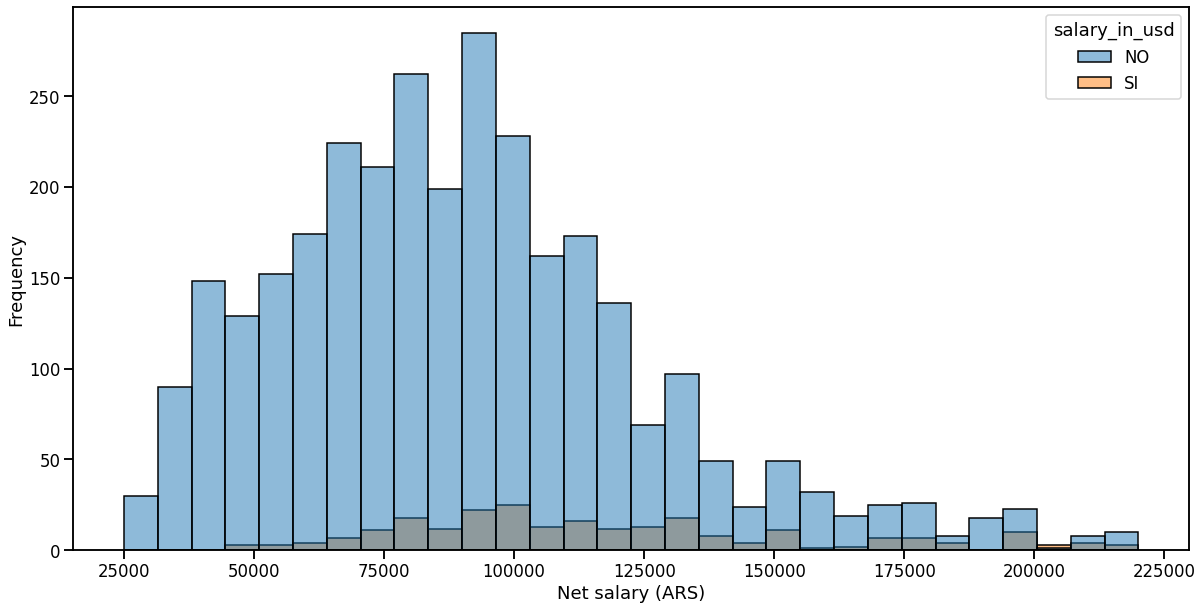

In [26]:
fig = plt.figure(figsize=(20,10))
seaborn.histplot(data=df_rango, x="salary_monthly_NETO",bins=30, hue="salary_in_usd").ticklabel_format(style='plain', axis='y')
plt.ylabel('Frequency')
plt.xlabel('Net salary (ARS)')

Decidimos filtrar los registros dolarizados por el desconocimiento del FX rate utilizado por el encuestado para convertir su salario a ARS.

Entonces aplicamos la siguiente condición:


> df.salary_in_usd='NO'




In [27]:
df_rango= df_rango[df_rango.salary_in_usd=='NO']
print('Número de filas POST 5º filtro:',len(df_rango.index))

Número de filas POST 5º filtro: 3061


### **VARIABLE: tools_programming_languages**

#### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [28]:
df_rango.tools_programming_languages[:3]

0                     Ninguno
1    HTML, Javascript, Python
2                     Ninguno
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [29]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df_rango.loc[:, 'cured_programming_languages'] = df_rango.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df_rango.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df_rango[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,work_contract_type,salary_in_usd,cured_programming_languages
0,ninguno,Ninguno,43000.0,53000.0,Full-Time,NO,[ninguno]
1,html,"HTML, Javascript, Python",63000.0,79000.0,Full-Time,NO,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Full-Time,NO,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,79000.0,Full-Time,NO,"[html, javascript, python]"
2,ninguno,Ninguno,127000.0,160000.0,Full-Time,NO,[ninguno]


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

Obtenemos la lista de los 10 lenguajes más frecuentes.

In [30]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:10]

,language,frequency
0,javascript,1191
1,sql,1110
2,html,859
3,java,824
4,python,758
5,css,582
6,bash/shell,552
7,.net,415
8,php,368
9,typescript,367


#### Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [31]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
interesting_languages = language_count[:10]['language'].tolist()
print("Lenguajes seleccionados:" ,interesting_languages)
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]

print('Número de filas POST 5º filtro (originales):',len(df_rango.index.value_counts()))
print( 'Número de filas con repeticion por lenguajes (df_lang):', len(filtered_df_lang.index))


Lenguajes seleccionados: ['javascript', 'sql', 'html', 'java', 'python', 'css', 'bash/shell', '.net', 'php', 'typescript']
Número de filas POST 5º filtro (originales): 3061
Número de filas con repeticion por lenguajes (df_lang): 7026


In [32]:

filtered_df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,work_contract_type,salary_in_usd,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,79000.0,Full-Time,NO,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Full-Time,NO,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,79000.0,Full-Time,NO,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,Full-Time,NO,"[bash/shell, c, css, html, java, javascript, p..."
3,css,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,Full-Time,NO,"[bash/shell, c, css, html, java, javascript, p..."


**NOTA**: Las celdas con programing_language fueron implícitamente eliminadas, ya que se filtraron aquellas con los 10 lenguajes más frecuentes.

## **Punto 3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas**

### Histograma de sueldos netos por lenguaje

Primeramente, decidimos realizar un gráfico de barras que nos permita visualizar el lenguaje asociado al mayor sueldo. 

Text(0, 0.5, 'Net salary (ARS)')

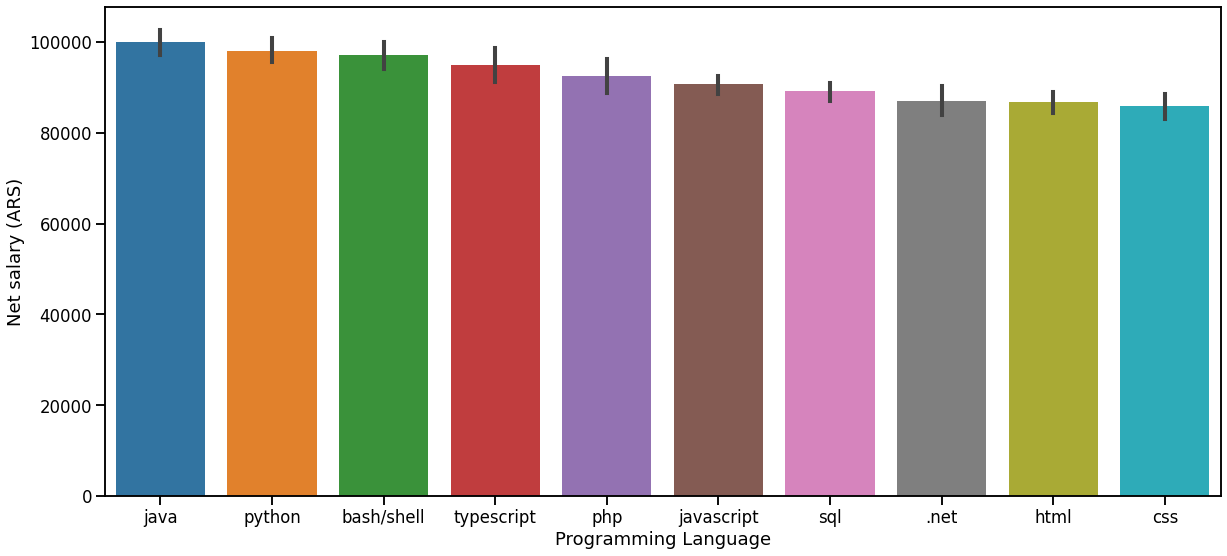

In [33]:
plt.figure(figsize=(20,9))
order=['java', 'python', 'bash/shell','typescript','php','javascript','sql','.net','html','css']
seaborn.barplot(x=filtered_df_lang.programming_language,y=filtered_df_lang.salary_monthly_NETO ,order=order)

plt.xlabel('Programming Language')
plt.ylabel('Net salary (ARS)')

Es importante notar que hay filas repetidas, pues en nuestro proceso de desdoblar la respuesta de los lenguajes conocidos por cada trabajador/a, se han repetido las filas de cada persona tantas veces como lenguajes conocidos indicó. Es decir, que si una persona indicó que conoce tres lenguajes, habrá tres filas que corresponden a esa persona una por cada lenguaje. A la hora de ver los salarios relacionados con cada lenguaje, sucede que un mismo salario se corresponderá con varios lenguajes. Siguiendo nuestro ejemplo de la persona con 3 lenguajes conocidos, en la grafica anterior, se sumará el valor del salario de esta persona al calculo de la media de cada lenguaje. Lo cual hace que la gráfica anterior y las subsiguientes no sean del todo representativas de la relación entre salario y lenguaje. 

*Analizamos* ahora la distribución de frecuencias del salario NETO para cada lenguaje mediante histogramas.

Text(0.5, 0, 'Net salary (ARS)')

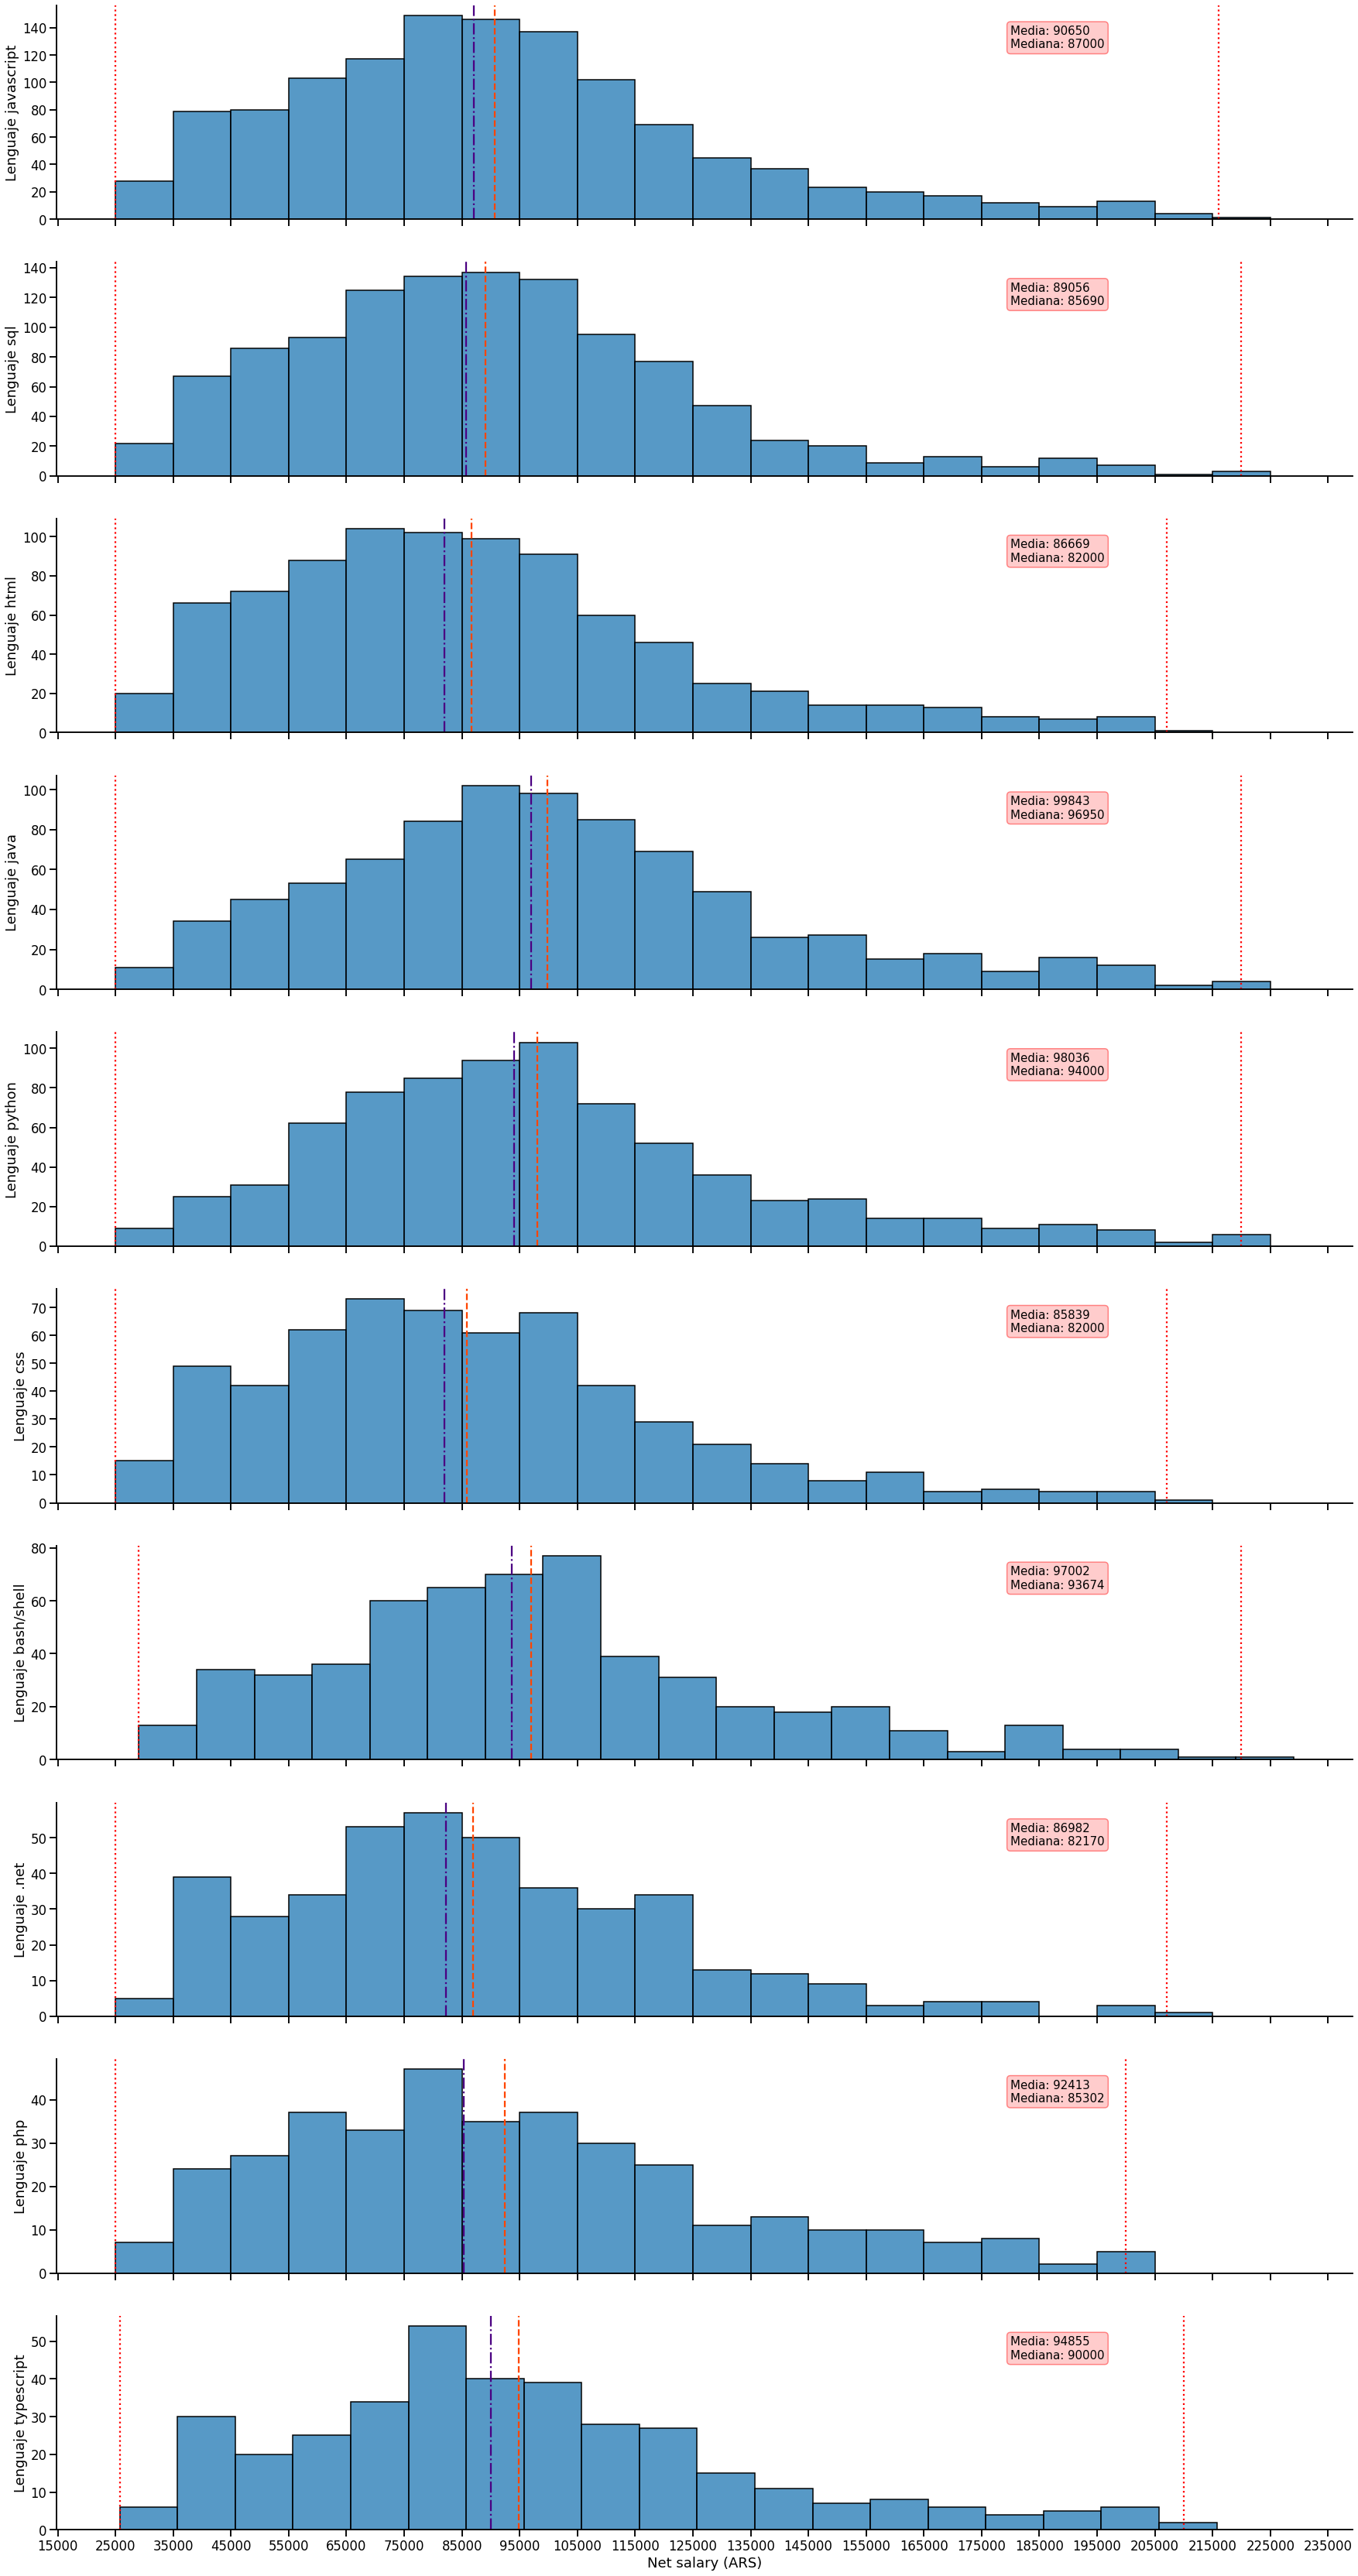

In [34]:
# agregamos los ejes x para que sean visualmente comparables al tener los mismos xsticks, 
# teniendo en cuenta los percentiles seleccionados previamente
increment = 10000
aux1=percentile_024 - increment
aux2=percentile_98 + increment

xticks_= [aux1]

while aux1 < aux2 :
    aux1= aux1 + increment
    xticks_.append(aux1)

# agregamos el histograma de salarios netos de cada lenguaje
fig, axes = plt.subplots(figsize=(30, 60), nrows=10, sharex=True)

for i in range(0,10):
    item_lang= interesting_languages[i]

    df_item=filtered_df_lang[filtered_df_lang.programming_language==item_lang]
    seaborn.histplot(data=df_item, x='salary_monthly_NETO', ax=axes[i],binwidth=increment, stat='count')
    media_item=df_item.salary_monthly_NETO.mean()
    mediana_item=df_item.salary_monthly_NETO.median()
    min_item=df_item.salary_monthly_NETO.min()
    max_item=df_item['salary_monthly_NETO'].max()

    ref='Media: '+ str(round(media_item)) + '\nMediana: '+ str(round(mediana_item))

    axes[i].axvline(media_item, color='orangered',linestyle='--', label='Media')
    axes[i].axvline(mediana_item, color='indigo',linestyle='-.', label='Mediana')
    axes[i].axvline(min_item, color='red',
                linestyle='dotted', label='Minimo')
    axes[i].axvline(max_item, color='red',
                linestyle='dotted', label='Maximo')

    label= "Lenguaje "+ item_lang
    axes[i].set_ylabel(label)
    axes[i].set_xticks(xticks_)
    start, end= axes[i].get_ylim()
    axes[i].text(180000,end*0.8,ref,size=15,bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8)))


seaborn.set_style("darkgrid")
seaborn.despine()
plt.xlabel('Net salary (ARS)')


### Bloxplot de sueldos netos por lenguaje

Analizamos la dispersión de la distribución de salarios netos según cada lenguaje.

(array([ 20000,  30000,  40000,  50000,  60000,  70000,  80000,  90000,
        100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000,
        180000, 190000, 200000, 210000, 220000]),
 <a list of 21 Text major ticklabel objects>)

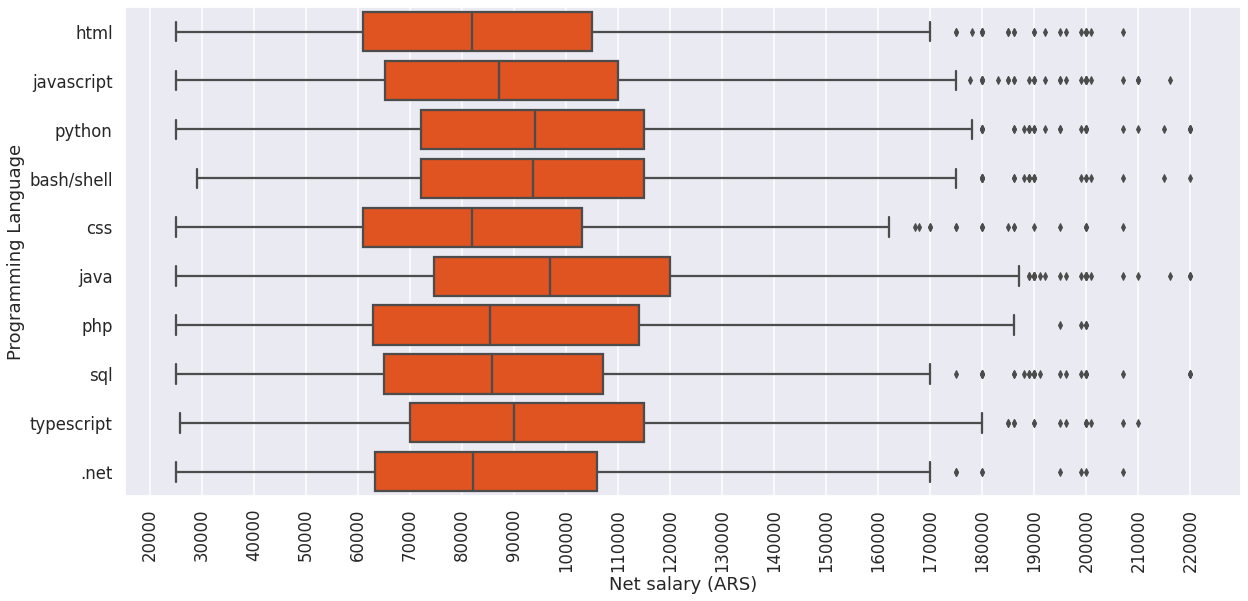

In [35]:
df_boxsplot = filtered_df_lang[{'programming_language', 'salary_monthly_NETO'}]
plt.figure(figsize=(20, 9))
seaborn.boxplot(data=df_boxsplot, x='salary_monthly_NETO', y='programming_language',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')

plt.ylabel('Programming Language')
plt.xlabel('Net salary (ARS)')
plt.xticks(np.arange(20000,230000,step=10000))
plt.xticks(rotation=90)

### **Respuesta a la pregunta: ¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Observamos en los gráficos que los lenguajes con salarios mas altos son:

**1) Programadores JAVA**
El salario NETO promedio de los programadores Java es de $99.843 (media).

El 50% de los programadores Java obtiene un salario NETO de al menos $ 96.950 (mediana).

El 75% de los programadores Java obtiene un salario NETO inferior a $ 120.000 (tercer cuantil).

El salario NETO de los programadores Java suele ser inferior a $190000 (aproximadamente), cualquier salario superior se considera un valor atípico.

Hay programadores con salarios NETO hasta $220.000, pero son valores outliers. 


**2) Programadores PYTHON**

El salario NETO promedio de los programadores Python es de $98.036 (media).

El 50% de los programadores Python obtiene un salario NETO de al menos $ 94.000 (mediana).

El 75% de los programadores Python obtiene un salario NETO inferior a $ 115.000 aproximadamente (tercer cuantil esta entre 110 y 120 mil).

El salario NETO de los programadores Python suele ser inferior a $180000 (aproximadamente), cualquier salario superior se considera un valor atípico.

Hay programadores con salarios NETO hasta $220.000, pero son valores outliers. 


**3) Programadores BASH/SHELL**

El salario NETO promedio de los programadores Bash/Shell es de $97.002 (media).

El 50 % de los programadores Bash/Shell obtiene un salario NETO de al menos $ 93.674 (mediana).

El 75% de los programadores Bash/Shell obtiene un salario NETO inferior a $ 115.000 aproximadamente (tercer cuantil esta entre 110 y 120 mil).

El salario NETO de los programadores Bash/Shell suele ser inferior a $175000 (aproximadamente), cualquier salario superior se considera un valor atípico.

Hay programadores con salarios NETO hasta $220.000, pero son valores outliers. 

## Ejercicio 2 - Densidades y varias varialbes
Responder a la pregunta general: ¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?


Para ello considere (igual al ejercicio Anterior):

1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones.

Se realiza la misma selección que para el punto anterior sin filtrar los trabajadores full-time. 

# **Ejercicio 2 - Densidades y varias variables**

Responder a la pregunta general: ¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?

Para ello considere (igual al ejercicio Anterior):

Seleccionar las columnas relevantes para analizar.
Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones.

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa

## b) Asociación

Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple. ¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría

## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación


## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)

# **RESPUESTAS EJERCICIO Nº2**



## **Punto 1 y 2. Seleccionar las columnas y filas relevantes para analizar.**

Como filas y columnas relevantes hemos decidido emplear las mismas que en el ejercicio 1, prescindiendo de la restricción de trabajo Full-Time, pues analizaremos, entre otras, esta variable categórica. Entonces, el nuevo dataset es:

In [36]:
#Pedimos que:
   ## Sueldos menores al percentil 95 y mayores al percentil 5. 
   ## Sueldos donde el porcentaje de descuentos es mayor al 15% y menor al 50%
   ## Trabajadores con contrato FULL TIME 
   ## Filas donde el salario NO es en USD

## Incluimos columna con % de retenciones en el dataframe original
df['porcentaje_retencion']= ((df['salary_monthly_BRUTO']- df['salary_monthly_NETO']) * 100 ) /(df['salary_monthly_BRUTO'])

## Y acotamos nuestro df

df_2 = df[(df['salary_monthly_NETO'] < percentile_98) \
                      & (df['salary_monthly_NETO'] >= percentile_024)\
                      & (df['porcentaje_retencion'] < 56) \
                      & (df['porcentaje_retencion'] >= 17)\
                      & (df['salary_in_usd']!='Mi sueldo está dolarizado')]


## a) Densidad conjunta

### ***Herramientas visuales y modelos***


Las herramientas utiles para explorar la base y descubrir patrones son:

**Distribuciones bivariadas**

**=> Graficos de barras**

El grafico de barras muestra la relacion entre una variable categorica y una variable continua. 

* **seaborn.barplot()** es útil cuando en el diagrama de barras queremos representar una medida de tendencia central para la segunda variable. Ejemplo: la media.

* **seaborn.countplot()** es útil cuando en el diagrama de barras queremos representar el numero de observaciones en cada categoria en lugar de calcular un estadistico. 

**=> Graficos de puntos**

Las graficas de puntos son similares a los graficas de barras pero el valor de la estimacion se representa con puntos en lugar de barras.

* **seaborn.jointplot()** es útil para mostrar un gráfico de dispersión para dos variables analizadas y un histograma adicional para cada una de ellas.


**=> Gráficos Densidad**

* **seaborn.histplot()** => Un histograma tiene como objetivo aproximar la función de densidad de probabilidad subyacente que generó los datos agrupando y contando observaciones. Es útil para variables cuantitativas, sin embargo, esta representación está muy influenciada por el número de bins que se seleccionen y el ancho de cada uno.

* **seaborn.kdeplot** =>  En lugar de utilizar bins discretos como el histograma, un gráfico de KDE suaviza las observaciones con un kernel gaussiano, lo que produce una estimación de densidad continua.

**=> Graficos de caja**

* **seaborn.boxplot()**=> Este tipo de gráfico muestra los valores de los tres cuartiles de la distribución junto con los valores extremos. Los "bigotes" se extienden a puntos que se encuentran dentro de 1,5 IQR del cuartil inferior y superior, y luego las observaciones que caen fuera de este rango se muestran de forma independiente. Esto significa que cada valor en la gráfica de caja corresponde a una observación real en los datos.

* **seaborn.boxeplot()**=>  Es similar al boxplot pero optimizada para mostrar más información sobre la forma de la distribución. Es más adecuado para conjuntos de datos muy grandes.


**=> Graficos de dispersión**

El diagrama de dispersión empareja los valores de dos variables y luego los representa como puntos geométricos dentro de un diagrama cartesiano. Nos permite visualizar las asociaciones que pueden existir entre ellas.

Para analizar la dispersión cuando *una o ambas variables* de estudio son *categoricas* utilizamos los:

* **seaborn.catplot()** => Hay dos variantes del mismo dadas por la propiedad "kind":
  -  **striplot ()** (kind por default) y,
  -  **swarmplot ()** (kind="swarm").

Para analizar la dispersión de variables cuantitativas:
* **seaborn.scatterplot()**
* **seaborn.lineplot()**

**Distribuciones de varias variables**

* **pandas.crosstab()** => Permite crear una tabla de tabulación cruzada que puede mostrar la frecuencia con la que aparecen ciertos grupos de datos. Es útil para dos o más variables categóricas.

* **seaborn.pairplot()**=> Permite visualizar múltiples distribuciones bivariadas. Crea una matriz de ejes y muestra la distribución de cada par de características.
En la diagonal principal se muestran las distribuciones univariadas de cada característica.

### ***Elección de variables y herramientas a usar***

**Variables seleccionadas:**
**Numéricas**
*   Salario neto.
*   Salario bruto.
*   Edad.

**Categóricas**
*   Tipo de Contrato de trabajo. 
*   Los salarios con bono.
*   Número de lenguajes conocidos por la persona.


**Visualizaremos a continuación el comportamiento de los datos de acuerdo a las variables elegidas para analizar.**

### ***Análisis de densidad conjunta para las variables elegidas.***

**BONOS**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


([<matplotlib.axis.XTick at 0x7fc206e33590>,
 [Text(0, 0, 'Zero'),
  Text(0, 0, '< 1 salary'),
  Text(0, 0, ' ~ 1 salary'),
  Text(0, 0, '1-3 salaries'),
  Text(0, 0, '> 3 salaries')])

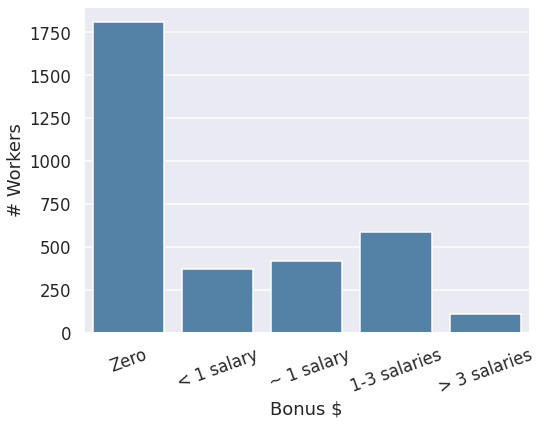

In [37]:
fig = plt.figure(figsize=(8,6))
seaborn.countplot(df_2.salary_has_bonus, color='steelblue')
plt.xticks(rotation=90)
plt.xlabel('Bonus $')
plt.ylabel('# Workers')
plt.xticks([0,1, 2, 3, 4], labels = ['Zero', '< 1 salary', ' ~ 1 salary', '1-3 salaries','> 3 salaries'], rotation = 20)

**Claramente, es posible observar que la mayoría de las personas no obtienen bono. En la siguiente figura, podemos ver que tipos de contrato de trabajo benefician a les trabajadores con bono.**

([<matplotlib.axis.YTick at 0x7fc2064dca50>,
 [Text(0, 0, 'Zero'),
  Text(0, 1, '< 1 salary'),
  Text(0, 2, ' ~ 1 salary'),
  Text(0, 3, '1-3 salaries'),
  Text(0, 4, '> 3 salaries')])

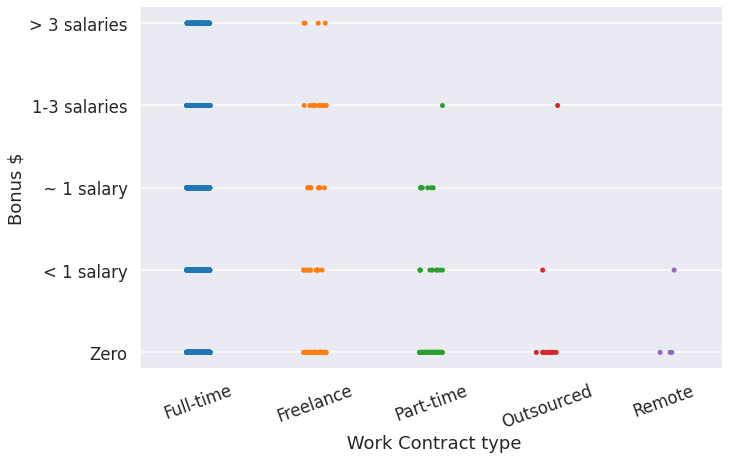

In [38]:
seaborn.catplot(data=df_2, y='salary_has_bonus',
                x='work_contract_type', height=6, aspect=2)
plt.ylabel('Bonus $')
plt.xlabel(' Work Contract type')
plt.xticks([0,1, 2, 3, 4], labels = ['Full-time', 'Freelance', 'Part-time', 'Outsourced','Remote'], rotation = 20)
plt.yticks([0,1, 2, 3, 4], labels = ['Zero', '< 1 salary', ' ~ 1 salary', '1-3 salaries','> 3 salaries'])

De la figura anterior observamos que les trabajadores con tipo de contrato Full Time son los más benefiaciados con bonos. 

**NÚMERO DE LENGUAJES CONOCIDOS**

Aquí el objetivo es evaluar si el número de lenguajes conocidos influye en el salario, pues hemos advertido que en general, las personas conocen más de un lenguaje y por ende asociar un unico lenguaje a los mejores salarios, como respondimos en el ejercicio 1, nos parece incorrecto. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

Text(0, 0.5, '# Workers')

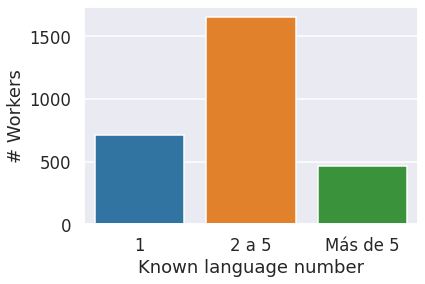

In [39]:
##El código a continuación separa los lenguajes, y luego categoriza el número de lenguajes en 4 opciones. 
# columnas relevantes
df_2['lang_number']=df_2['salary_monthly_BRUTO']*0 #Agregamos columna que indique el numero de lenguajes conocido por cada trabajadore. Luego definiremos los valores de dicha col. 
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO', 'salary_monthly_BRUTO', 'work_contract_type','salary_in_usd','lang_number', 'salary_has_bonus', 'profile_age', 'profile_gender', 'profile_studies_level']
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):  # La función isinstance() devuelve True si el objeto especificado es del tipo especificado, en caso contrario False.
    return [] 
  # Remove 'other' option
  languages_str = languages_str.lower()\
                .replace('ninguno de los anteriores', '')  #lower() pasa todo a minuscula
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '') #strip() elimina espacios, strip(",") elimina comas. 
          for lang in languages_str.split()] # The split() method splits a string into a list. You can specify the separator, default separator is any whitespace ''.


# Create a new column with the list of languages
df_2.loc[:, 'cured_programming_languages'] = df_2.tools_programming_languages\
.apply(split_languages)   # data.loc[<row selection>, <column selection>]
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_2_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang_number = df_2.cured_programming_languages\
    .apply(pd.Series) 
aux = (df_lang_number.notnull().sum(axis=1)).to_frame()
df_2.append(aux)
df_2.loc[:, 'lang_number']=df_lang_number.notnull().sum(axis=1) #Agregamos columna que indique el numero de lenguajes conocido por cada trabajadore. 
df_lang = df_2.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df_2[relevant_columns])\
    .rename(columns={0: 'programming_language'})
#stack() reorganiza el df, como que disminuye en 1 el nivel de columnas. https://www.w3resource.com/pandas/dataframe/dataframe-stack.php

# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang['porcentaje_retencion']= ((df_lang['salary_monthly_BRUTO']- df_lang['salary_monthly_NETO']) * 100 ) /(df_lang['salary_monthly_BRUTO'])

#Pedimos nuevamente que:
   ## Sueldos menores al percentil 95 y mayores al percentil 5. 
   ## Sueldos donde el porcentaje de descuentos es mayor al 15% y menor al 50%
   ## Filas donde el salario NO es en USD
   ##Filas donde el lenguaje NO es ninguno
df_lang = df_lang[(df_lang['salary_monthly_NETO'] < percentile_98) \
                      & (df_lang['salary_monthly_NETO'] >= percentile_024)\
                      & (df_lang['porcentaje_retencion'] < 56) \
                      & (df_lang['porcentaje_retencion'] >= 17)\
                      & (df_lang['salary_in_usd']!='Mi sueldo está dolarizado')]

###Con la intencion de observar la dependencia de los salarios con el numero de lenguajes que saben los trabajadores, realizamos lo siguiente:

#Los valores de la columna "lang_number" se transforman de variables ordinales a variables categoricas. 
new_groups = {
    1: '1',
    2: '2 a 5',3: '2 a 5',4: '2 a 5',5: '2 a 5',6: 'Más de 5',7: 'Más de 5',8: 'Más de 5',9: 'Más de 5',10: 'Más de 5',11: 'Más de 5',12: 'Más de 5',13: 'Más de 5',
    14: 'Más de 5',15: 'Más de 5',16: 'Más de 5',17: 'Más de 5',18: 'Más de 5',
    }

hue_order = ['1', '2 a 5', 'Más de 5']   

df_lang['lang_number'] = df_lang['lang_number'].replace(new_groups)

#Finalmente, antes de graficar, elimino las filas duplicadas (o repetidas n veces):

df_drop=df_lang.drop_duplicates(subset=["tools_programming_languages","salary_monthly_NETO","salary_monthly_BRUTO","lang_number"])

#Aqui observaremos si el numero de personas que saben mas de un lenguaje es relevante
plt.figure()
order=['1', '2 a 5', 'Más de 5']
seaborn.countplot(df_drop.lang_number, order=order)
plt.xlabel('Known language number')
plt.ylabel('# Workers')




### Conclusión

Son 714 personas las que saben 1 lenguaje
Son 1652 personas las que saben entre 2 y 5 lenguajes
Son 465 personas las que saben + de 5 lenguajes 


Por lo tanto, la mayoria sabe mas de un lenguaje y así reforzamos la idea anterior de que no es del todo correcta la grafica de lenguaje vs salario vista anteriormente. 

Text(0, 0.5, 'Net salary (ARS)')

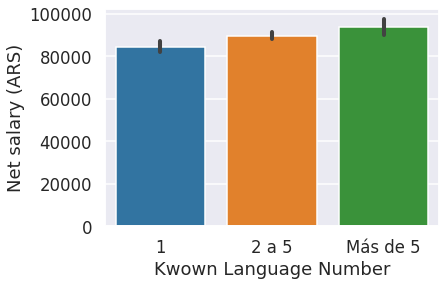

In [40]:
# Veamos si hay relacion entre el Salario y el numero de lenguajes conocidos
order=['1', '2 a 5', 'Más de 5']
seaborn.barplot(x=df_drop.lang_number,y=df_drop.salary_monthly_NETO, order=order)
plt.xlabel('Kwown Language Number')
plt.ylabel('Net salary (ARS)')


**Se observa que hay una tendencia de crecimiento en el salario con el numero de lenguajes.**

## b) Asociación

### **Análisis gráfico**

Utilizaremos gráficos de dispersión para visualizar la posible asociación entre las dos variables cuantitativas:
1.   salary_monthly_BRUTO
2.   salary_monthly_NETO

Dado que las variables son numéricas, creemos apropiado utilizar los gráficos lineplot() y jointplot().

De la observación del gráficos podremos asumir la posibilidad de una correlación lineal entre las variables.


Primero creamos un dataframe auxiliar con las columnas de interés para este análisis:

In [41]:
df_asociacion= df_2.loc[:,['salary_monthly_BRUTO','salary_monthly_NETO']]
df_asociacion[:5]

,salary_monthly_BRUTO,salary_monthly_NETO
0,53000.0,43000.0
1,79000.0,63000.0
2,160000.0,127000.0
3,130000.0,102000.0
4,140000.0,106000.0


Ahora procedemos a graficar las variables salario neto y bruto en el gráfico de líneas.


Text(0, 0.5, 'Net Salary (ARS)')

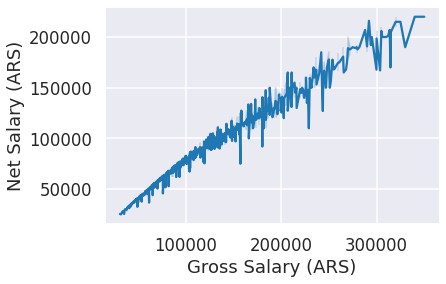

In [42]:
seaborn.lineplot(data=df_asociacion, y='salary_monthly_NETO',
                 x='salary_monthly_BRUTO')
plt.xlabel('Gross Salary (ARS)')
plt.ylabel('Net Salary (ARS)')

Adicionalmente, graficaremos ambas variables en un jointplot()

Text(47.25, 0.5, 'Net Salary (ARS)')

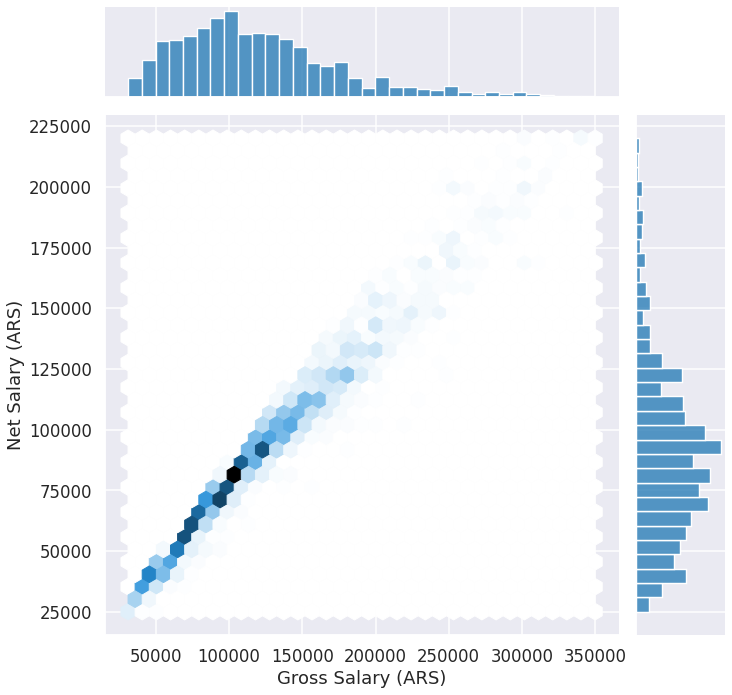

In [43]:
seaborn.jointplot(data=df_2, x='salary_monthly_BRUTO',
                  y='salary_monthly_NETO', kind='hex', height=10)
# Remove scietific notation
plt.ticklabel_format(style='plain', axis='y')

plt.xlabel('Gross Salary (ARS)')
plt.ylabel('Net Salary (ARS)')

**Observamos que parece existir una relación lineal positiva entre ambas variables, ya que a medida que crece el salario BRUTO tambien lo hace el salario NETO.**

### **Cálculo de la Covarianza**

En python, utilizamos el método cov para calcular la matriz de varianzas y covarianzas de las variables numéricas de un DataFrame. Si luego queremos una covarianza en particular, podemos utilizar .loc con los nombres de las variables que nos interesan.

In [44]:
cov_matriz=df_asociacion.cov()
cov_matriz[:5]

,salary_monthly_BRUTO,salary_monthly_NETO
salary_monthly_BRUTO,3.039897e+09,1.928800e+09
salary_monthly_NETO,1.928800e+09,1.270101e+09


In [45]:
print ( "La covarianza de ambas variables es: ",cov_matriz.loc["salary_monthly_BRUTO", "salary_monthly_NETO"])

La covarianza de ambas variables es:  1928799969.6081197


Con este estadístico medimos el signo de la relación lineal entre X e Y:

* Si SXY=0 entonces no existe relación lineal entre X e Y
* Si SXY>0 entonces existe una relación lineal directa o positiva entre X e Y. Esto es, a mayores valores de X, en promedio tenemos mayores valores de Y y viceversa.
* Si SXY<0 entonces existe una relación lineal inversa o negativa entre X e Y. Esto es, a mayores valores de X, en promedio tenemos menores valores de Y y viceversa.

**Conclusión: Existe una relación lineal directa o positiva entre el Salario Bruto y le salario Neto.**

### **Cálculo de los coeficientes de correlación**

La correlación lineal es un método estadístico que permite cuantificar la relación lineal existente entre dos variables. Existen varios estadísticos, llamados coeficientes de correlación lineal, desarrollados con el objetivo de medir este tipo de asociación, algunos de los más empleados son Pearson, Spearman y Kendall. 

Existen varias librerias que nos permiten calcular estos indicadores.Todos ellos comparten que:

* Su valor está comprendido en el rango [+1 , -1]. Siendo +1 una correlación positiva perfecta y -1 una correlación negativa perfecta.

* Se emplean como medida de la fuerza de asociación entre dos variables (tamaño del efecto):

          0: asociación nula.

          0.1: asociación pequeña.

          0.3: asociación mediana.

          0.5: asociación moderada.

          0.7: asociación alta.

          0.9: asociación muy alta.

Desde el punto de vista práctico, las principales diferencias entre estos tres coeficientes son:

* La correlación de Pearson funciona bien con variables cuantitativas que tienen una distribución normal o próxima a la normal. Es más sensible a los valores extremos que las otras dos alternativas.

* La correlación de Spearman se emplea con variables cuantitativas (continuas o discretas). En lugar de utilizar directamente el valor de cada variable, los datos son ordenados y reemplazados por su respectivo orden ranking. Es un método no paramétrico muy utilizado cuando no se satisface la condición de normalidad necesaria para aplicar la correlación de Pearson.

* La correlación de Kendall es otra alternativa no paramétrica que, al igual que la correlación de Spearman, utiliza la ordenación de las observaciones ranking. Es recomendable cuando se dispone de pocos datos y muchos de ellos ocupan la misma posición en el rango, es decir, cuando hay muchas ligaduras.

Para poder elegir el coeficiente de correlación adecuado, se tiene que analizar el tipo de variables y la distribución que presentan.

Para analizar la distribución de estas variables cuantitativas utilizaremos histogramas.

Text(0, 0.5, '# Workers')

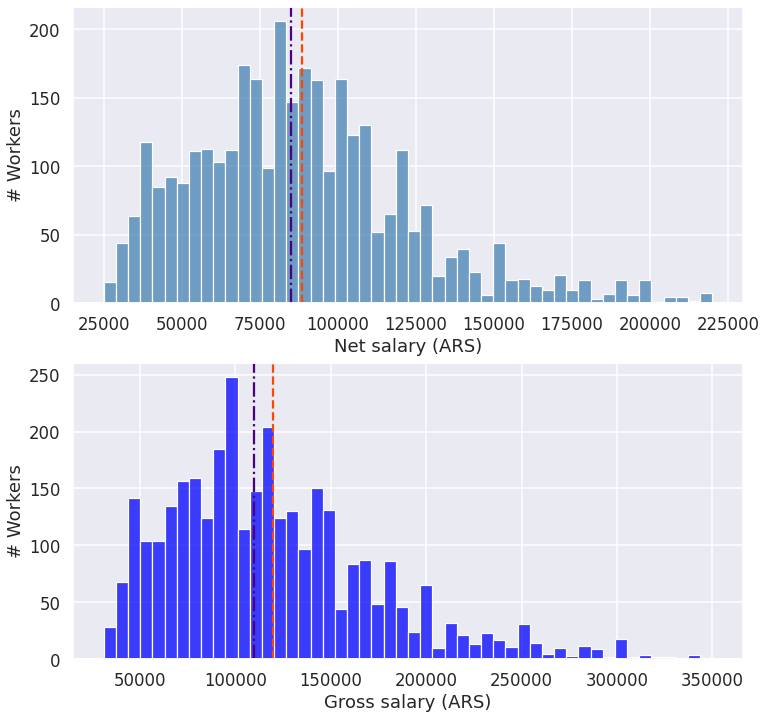

In [46]:
fig, axes = plt.subplots(figsize=(12, 12), nrows=2)

seaborn.histplot(x=df_asociacion['salary_monthly_NETO'], ax=axes[0], color='steelblue', bins=50)
axes[0].axvline(df_asociacion['salary_monthly_NETO'].mean(), color='orangered',
            linestyle='--', label='Media')
axes[0].axvline(df_asociacion['salary_monthly_NETO'].median(), color='indigo',
            linestyle='-.', label='Mediana')
axes[0].set_xlabel('Net salary (ARS)')
axes[0].set_ylabel('# Workers')
seaborn.histplot(x=df_asociacion['salary_monthly_BRUTO'], ax=axes[1], color='blue', bins=50)
axes[1].axvline(df_asociacion['salary_monthly_BRUTO'].mean(), color='orangered',
            linestyle='--', label='Media')
axes[1].axvline(df_asociacion['salary_monthly_BRUTO'].median(), color='indigo',
            linestyle='-.', label='Mediana')
axes[1].set_xlabel('Gross salary (ARS)')
axes[1].set_ylabel('# Workers')

Observamos que la distribución de los datos NO es simétrica respecto a la media como se espera en una distribución normal. Dado que la media es mayor a la mediana podemos decir que los datos poseen una distribución asimétrica de cola derecha.

Aplicaremos una transformación logaritmica de los datos y gráficaremos nuevamente los histogramas.

Text(0, 0.5, '# Workers')

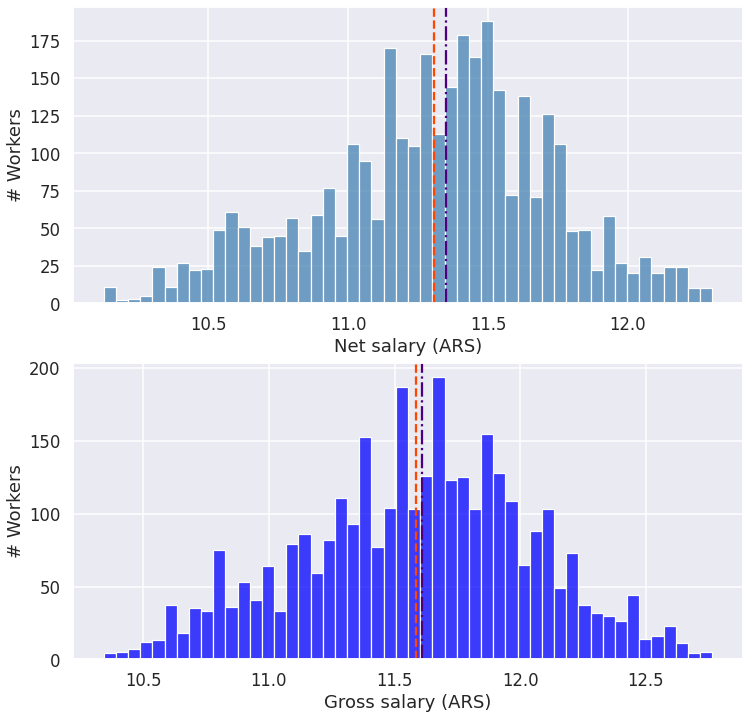

In [47]:

fig, axes = plt.subplots(figsize=(12, 12), nrows=2)

seaborn.histplot(x=np.log(df_asociacion['salary_monthly_NETO']), ax=axes[0], color='steelblue', bins=50)
axes[0].axvline(np.log(df_asociacion['salary_monthly_NETO']).mean(), color='orangered',
            linestyle='--', label='Media')
axes[0].axvline(np.log(df_asociacion['salary_monthly_NETO']).median(), color='indigo',
            linestyle='-.', label='Mediana')
axes[0].set_xlabel('Net salary (ARS)')
axes[0].set_ylabel('# Workers')

seaborn.histplot(x=np.log(df_asociacion['salary_monthly_BRUTO']), ax=axes[1], color='blue', bins=50)
axes[1].axvline(np.log(df_asociacion['salary_monthly_BRUTO']).mean(), color='orangered',
            linestyle='--', label='Media')
axes[1].axvline(np.log(df_asociacion['salary_monthly_BRUTO']).median(), color='indigo',
            linestyle='-.', label='Mediana')

axes[1].set_xlabel('Gross salary (ARS)')
axes[1].set_ylabel('# Workers')

La transformación logarítmica de los salarios consigue una distribución más próxima a la normal. 
Se procede a calcular los tres tipos de coeficientes.

**PANDAS**

In [48]:
# Cálculo de correlación con Pandas
# ==============================================================================
print('Correlación Pearson: ',np.log(df_asociacion['salary_monthly_BRUTO']).corr( np.log(df_asociacion['salary_monthly_NETO']), method='pearson'))
print('Correlación spearman: ', np.log(df_asociacion['salary_monthly_BRUTO']).corr( np.log(df_asociacion['salary_monthly_NETO']), method='spearman'))
print('Correlación kendall: ', np.log(df_asociacion['salary_monthly_BRUTO']).corr( np.log(df_asociacion['salary_monthly_NETO']), method='kendall'))


Correlación Pearson:  0.9877972794088764
Correlación spearman:  0.9887847179192973
Correlación kendall:  0.9260748397194589


Una limitación de Pandas es que no calcula la significancia estadística.

**SCIPY**

La implementación de Scypy.stats sí permite calcular la significancia estadística además del coeficiente de correlación.

In [49]:
# Cálculo de correlación y significancia con Scipy
# ==============================================================================
r, p = stats.pearsonr(np.log(df_2['salary_monthly_BRUTO']),np.log(df_2['salary_monthly_NETO']))
print(f"Correlación Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(np.log(df_2['salary_monthly_BRUTO']),np.log(df_2['salary_monthly_NETO']))
print(f"Correlación Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(np.log(df_2['salary_monthly_BRUTO']),np.log(df_2['salary_monthly_NETO']))
print(f"Correlación Pearson: r={r}, p-value={p}")

Correlación Pearson: r=0.9877972794088767, p-value=0.0
Correlación Spearman: r=0.9887847179192973, p-value=0.0
Correlación Pearson: r=0.9260748397194589, p-value=0.0


 **Conclusión:**

**Teniendo en cuenta los coeficientes de correlación obtenidos con las librerias PANDAS y SPICY, podemos asumir que ambas variables poseen una asociación muy alta y que existe evidencia estadística de que la relación observada no se debe al azar ( pvalue≈0 )**


## c) Densidad condicional
Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable 'salary_monthly_NETO' ¿Considera que ambas variables son independientes? ¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


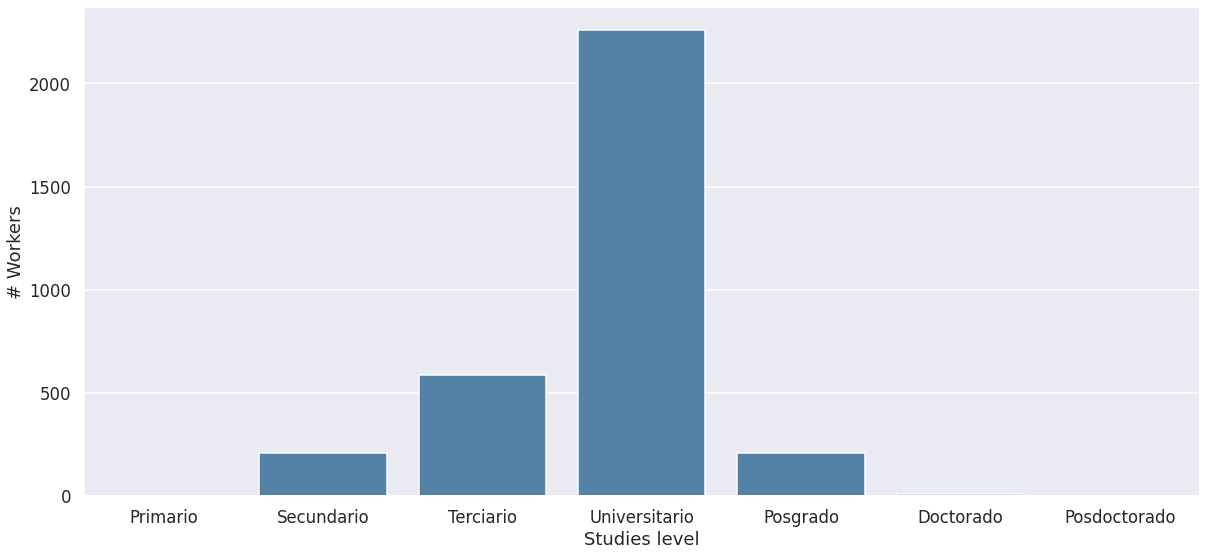

In [50]:
sorted_studies_levels = ['Primario', 'Secundario', 'Terciario', 'Universitario',
                         'Posgrado', 'Doctorado', 'Posdoctorado']
plt.figure(figsize=(20,9))
g = seaborn.countplot(df_2.profile_studies_level, color='steelblue', 
                  order=sorted_studies_levels)
for ax in axes:
  ax.tick_params(labelrotation=30)
  plt.ylabel('# Workers')
  plt.xlabel('Studies level')

Seleccionamos los niveles de estudio con mayor frecuencia: Terciario y Universitario.

Text(0.5, 0, 'Net salary (ARS)')

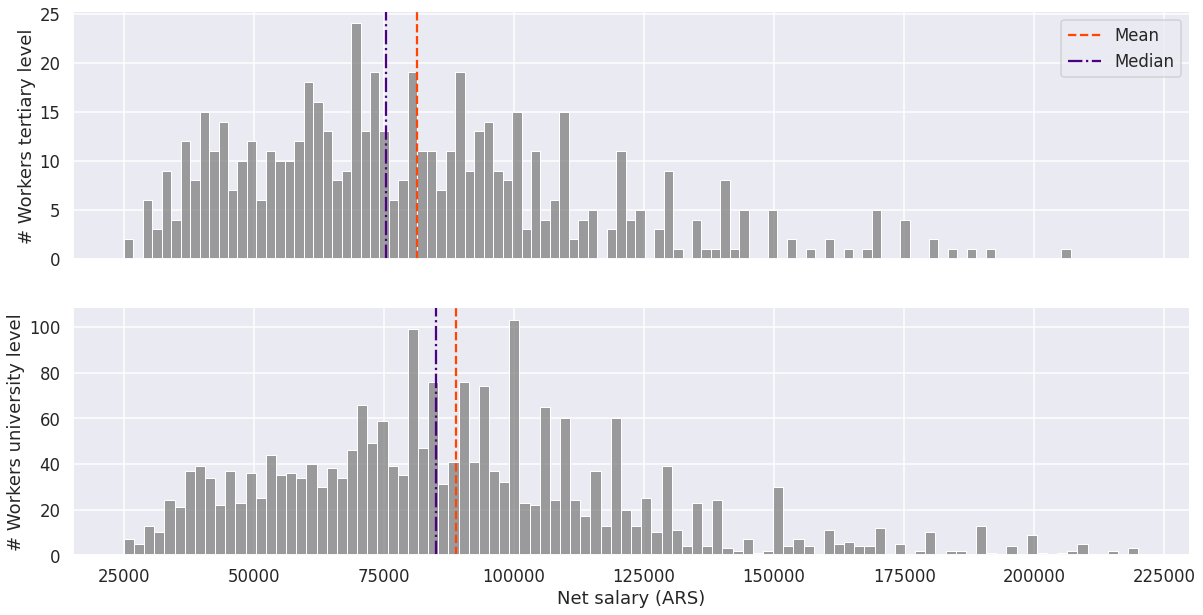

In [51]:
##Seleccionamos TERCIARIO Y UNIVERSITARIO
df_lang_terciario = df_2[df_2['profile_studies_level'] == 'Terciario']
df_lang_universitario = df_2[df_2['profile_studies_level'] == 'Universitario']

fig, axes = plt.subplots(nrows=2, figsize=(20, 10), sharex=True)
seaborn.histplot(df_lang_terciario['salary_monthly_NETO'], bins=100, ax=axes[0], color='gray')
axes[0].axvline(df_lang_terciario.salary_monthly_NETO.mean(), color='orangered',
            linestyle='--', label='Mean')
axes[0].axvline(df_lang_terciario.salary_monthly_NETO.median(), color='indigo',
            linestyle='-.', label='Median')

seaborn.histplot(df_lang_universitario['salary_monthly_NETO'], bins=100, ax=axes[1], color='gray')
axes[1].axvline(df_lang_universitario.salary_monthly_NETO.mean(), color='orangered',
            linestyle='--', label='Mean')
axes[1].axvline(df_lang_universitario.salary_monthly_NETO.median(), color='indigo',
            linestyle='-.', label='Median')

axes[0].legend()
axes[0].set_ylabel('# Workers tertiary level')
axes[1].set_ylabel('# Workers university level')
seaborn.despine()
plt.xlabel('Net salary (ARS)')

Graficamos la densidad para ambos dataframes.

Text(0.5, 0, 'Net salary (ARS)')

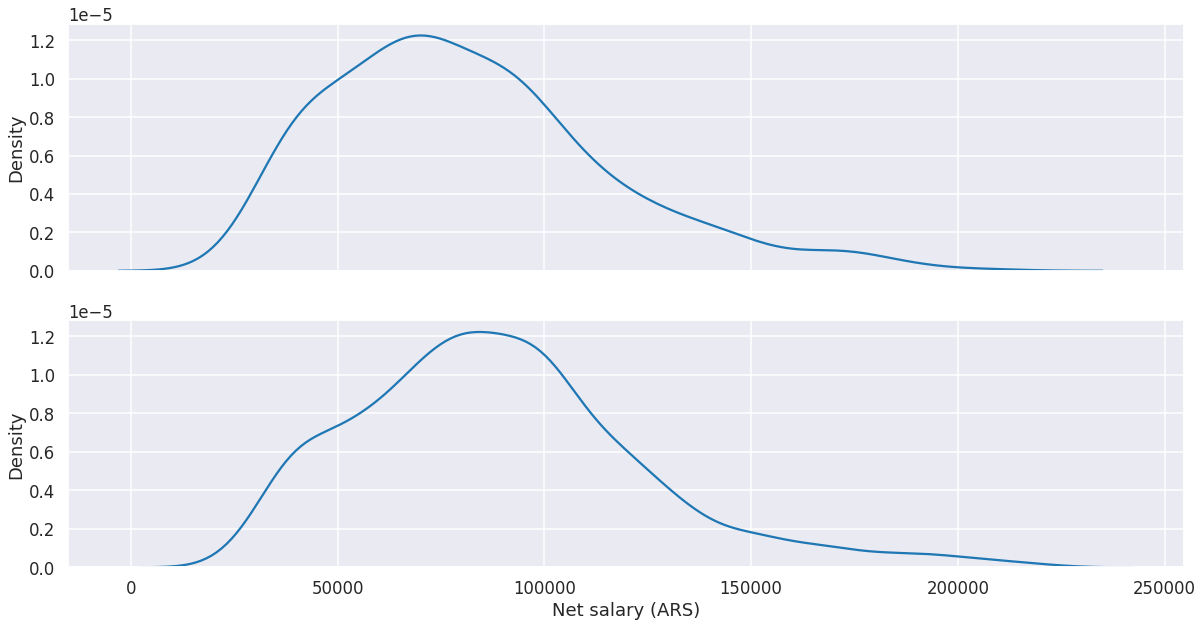

In [52]:
fig, axes = plt.subplots(nrows=2, figsize=(20, 10), sharex=True)

seaborn.kdeplot(data=df_lang_terciario, x="salary_monthly_NETO",ax=axes[0])
seaborn.kdeplot(data=df_lang_universitario, x="salary_monthly_NETO",ax=axes[1])
plt.xlabel('Net salary (ARS)')

Obtenemos las medidas descriptivas de ambos dataframes df_ling_terciarios y df_lang_universitarios:

In [53]:
df_lang_terciario.salary_monthly_NETO.describe()

count       588.000000
mean      81382.173980
std       33356.098534
min       25000.000000
25%       57027.000000
50%       75421.500000
75%      100000.000000
max      207020.000000
Name: salary_monthly_NETO, dtype: float64

In [54]:
df_lang_universitario.salary_monthly_NETO.describe()

count      2257.000000
mean      88868.026766
std       34964.242852
min       25000.000000
25%       65000.000000
50%       85000.000000
75%      107000.000000
max      220000.000000
Name: salary_monthly_NETO, dtype: float64

Consideramos que las variables son dependientes ya que los valores del salario neto dependen de los valores que toma el salario bruto. Podemos ver como a medida que crece el salario bruto también lo hace el neto y también el porcentaje de descuento que se aplica al salario bruto. A continuación se presenta un gráfico de dicha relación entre las variables:

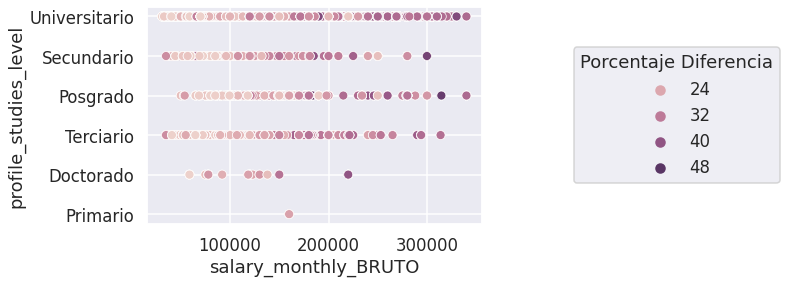

In [56]:
g= seaborn.scatterplot(data=df_lang, x="salary_monthly_BRUTO", y="profile_studies_level", hue="porcentaje_retencion")
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1, title='Porcentaje Diferencia')

## d) Densidad Conjunta condicional
Las variables seleccionadas son:

*  Sueldo Neto (numérica).
*  Años de experiencia (numérica).
*  Género (categórica).



In [ ]:
hue_order=['Mujer','Hombre','Otros']
plt.figure(figsize=(30,9))
df_2=df_2[(df_2['profile_years_experience']<115)]
df_2['profile_years_experience']=df_2['profile_years_experience'].round()
seaborn.scatterplot(y=df_2['profile_years_experience'],x=df_2['salary_monthly_NETO'],hue=df_2['profile_gender'],hue_order=hue_order ,palette='husl')# , ci=None) )# , ci=None)
#plt.xlim(1,60)
#df_restricted['profile_age']
plt.text(25000,40,'Años de experiencia vs. Salario Neto',size=15,bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8)))

plt.ylim(0,38)
plt.xlabel('Net Salary (ARS)')
plt.ylabel('Years of experience')

##SE OBSERVA AHORA SÍ UN INCREMENTO EN EL SALARIO CON LA EXPERIENCIA. 

Aquí se observa los años de experiencia vs. el salario. Por un lado, vemos que los mayores sueldos se corresponden con más años de experiencia. Lo inverso no necesariamente es verdadero, es decir, observamos un importante número de trabajadores cuyos años de experiencia NO parecen influenciar sus remuneraciones. 

Por otro lado, vemos segmentados los datos por género distinguiendo varones, mujeres y "otros". Se observan pocas mujeres y personas no-binarias (otros) con altos sueldos y muchos años de experiencia. La mayoría de estas personas se concentran en los numeros mas bajos de años de experiencia. 

Es destacable tmb el bajo porcentaje de mujeres y personas no binarias que pertenecen a esta industria segun esta muestra.

Si bien esto es solo una muestra de la población de trabajadores de IT, creemos que representa de manera bastante acertada a la población real de trabajadores. 



